In [22]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

../InputData/zT_Rebin_14/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_14/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_14/pPb_SE_L0_Correlation_GMB_Ratio.root


In [32]:
print(ue_error_bar)
print(dPhi_Bins[ZYAM_Min_i]),
print(dPhi_Bins[ZYAM_Max_i])
print(delta_phi_centers[ZYAM_Min_i:ZYAM_Max_i])

[0.39269908169872414, 1.7671458676442586]
0.392699081699 1.76714586764
[0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777]


**root to numpy**

In [23]:
Corrs = ROOT_to_nparray()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [24]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)
#Plot_UB_Subtraction(Corrs)

**Pedestal Subtraction**

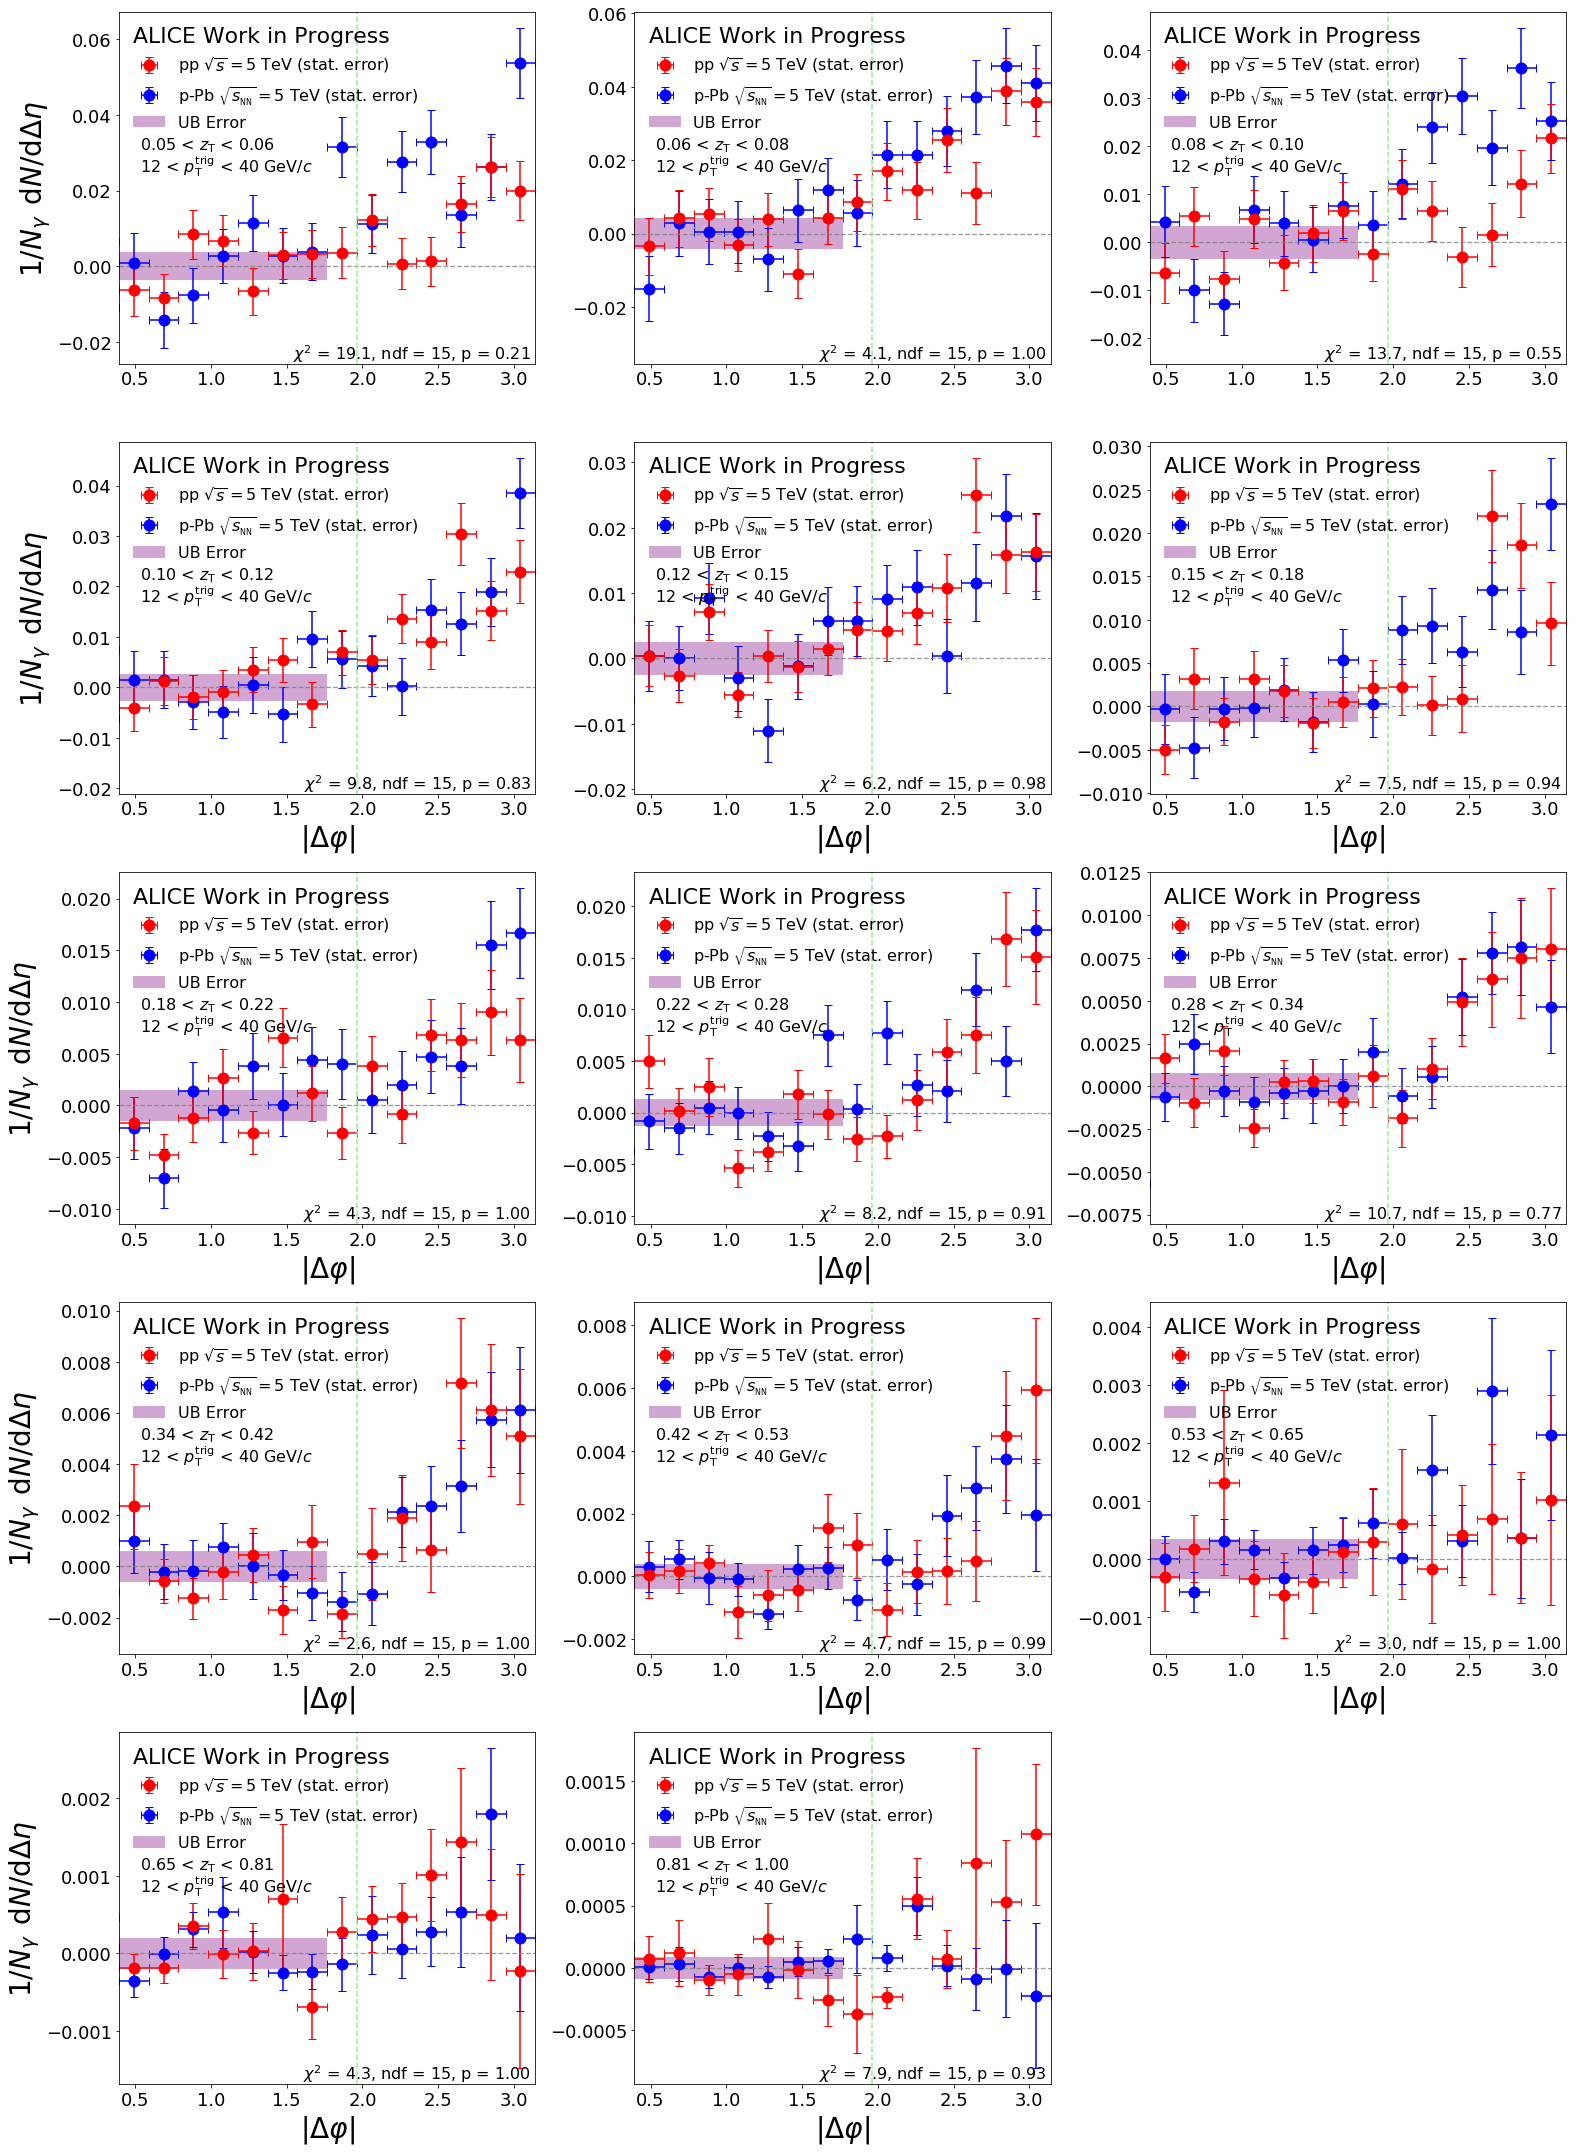

In [25]:
Ped_Sub_After_Cs(Corrs)
#print_from_Dict(Corrs)

Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [5]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][5])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][5][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][5][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][5][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)

Number of Away side bins = 6
[ 0.00055127  0.00346563 -0.0049702   0.00320726 -0.00176582  0.00313793
  0.00179303 -0.00193043  0.00052824  0.00211089  0.0022188   0.00011255
  0.00089238  0.02196154  0.01858327  0.00957857]
pp
0.045282 +\- 0.008966 +\- 0.005802
0.23585075041214892
p-Pb
0.059380 +\- 0.009392 +\- 0.006946
0.19673162423882337


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [6]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [7]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
for i in range(len(Frags["pp_FF"][0])):
    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

0.296845 0.190778 0.424780 0.176040 0.200999 0.235851 0.327177 0.231891 0.285203 0.279058 0.407159 1.213363 0.617935 0.477280


In [8]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_14 Integrating 5\pi/8
pp: p = 2.23, chi2/dof = 2.45
[11.14226818893823, 6.505561660440141, 3.7132844821989375, 2.3730451872930205, 1.5026500981620132, 0.9602971710686488, 0.6251655965642913, 0.379984953302873, 0.2351370124242629, 0.149290187627772, 0.09074079777594136, 0.055938833217700046, 0.0347848020655883, 0.02153566342723503]


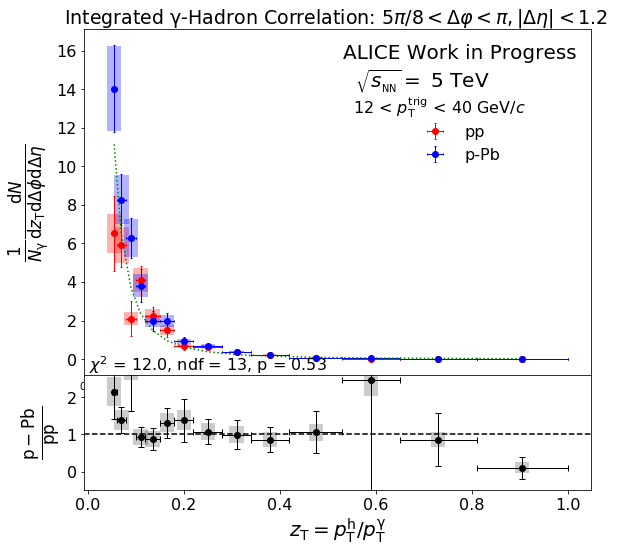

pp_purity_FF_Errors:
0.9618, 0.8736, 0.3103, 0.6050, 0.3300, 0.2224, 0.0985, 0.0921, 0.0539, 0.0335, 0.0115, 0.0031, 0.0028, 0.0019, 

p-Pb_FF_Errors:
2.2591, 1.3141, 1.0473, 0.8399, 0.5260, 0.3894, 0.2429, 0.1426, 0.0945, 0.0530, 0.0287, 0.0187, 0.0093, 0.0037, 

pp_FF:
6.5272, 5.9291, 2.1056, 4.1059, 2.2396, 1.5094, 0.6688, 0.6252, 0.3659, 0.2271, 0.0783, 0.0210, 0.0192, 0.0126, 

pp_FF_Errors:
1.9376, 1.1311, 0.8944, 0.7228, 0.4502, 0.3560, 0.2188, 0.1450, 0.1044, 0.0634, 0.0319, 0.0255, 0.0119, 0.0060, 

p-Pb_FF:
14.0357, 8.2720, 6.2742, 3.8175, 1.9661, 1.9793, 0.9186, 0.6665, 0.3640, 0.1951, 0.0828, 0.0516, 0.0165, 0.0013, 

p-Pb_purity_FF_Errors:
2.0681, 1.2188, 0.9245, 0.5625, 0.2897, 0.2916, 0.1354, 0.0982, 0.0536, 0.0288, 0.0122, 0.0076, 0.0024, 0.0002, 



In [9]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [10]:
reload(functions_fragmentation)
from functions_fragmentation import *

IndexError: index 14 is out of bounds for axis 0 with size 14

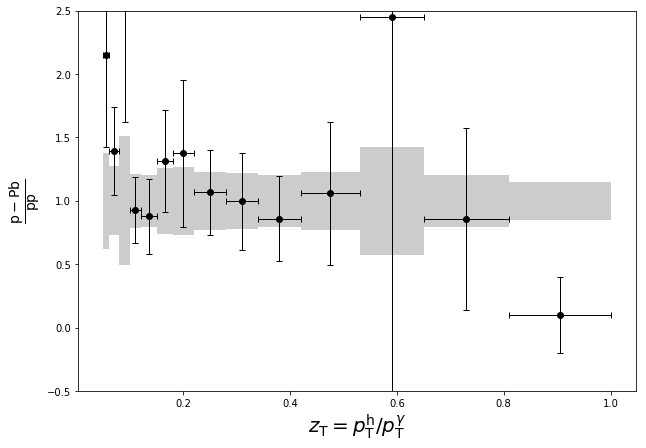

In [11]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

###### Compare Different Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)